The primary objective of this exploratory data analysis (EDA) project is to uncover insights from Hillary Clinton's emails using NLP and statistical methods. The project aims to:

1) Identify the common topics discussed using TF-IDF
2) Understand the network of senders and recipients to identify key figures and their relationships.
   Explore the frequency and patterns of email communications over time.


**Data Cleaning and Preprocessing:** This initial step involves cleaning the dataset for analysis, including handling missing values, removing duplicates, and standardizing date formats. NLP-specific preprocessing will also be necessary, such as tokenization, removing stopwords, and lemmatization.

**Exploratory Data Analysis:** Employing statistical and visualization techniques to summarize the dataset's main characteristics. This includes analyzing the distribution of emails over time, the most frequent senders and recipients, and the length of emails.

**TF-IDF:** Using NLP techniques such as TF-IDF or count vectorization generate a list of the five TF-IDF terms that best describe the emails. This can provide insights into the main topics and themes discussed in the emails.

**Temporal Analysis:** Investigate how email communications change over time, identify any patterns or anomalies in the volume of emails sent and received, and correlate these with external events or timelines.


**Imports**

In [61]:
import pandas as pd
import numpy as np
import sklearn
import gensim as gensim
import matplotlib.pyplot as plt


**Read csv file**

In [49]:
emails = pd.read_csv("Emails.csv")

**(1a) Data Cleaning: General** 

Handling Missing Values

In [50]:
emails['ExtractedBodyText'].fillna('null', inplace=True)

In [51]:
emails

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,null,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,null,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\r\nFriday, March 1...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940,7941,C05778462,WYDEN,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Verma, Richard R <VermaRR@state.gov>",NaN,"Thursday, December 16, 2010 7:41 PM",F-2014-20439,C05778462,08/31/2015,RELEASE IN PART,null,UNCLASSIFIED U.S. Department of State Case No....
7941,7942,C05778463,SENATE,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Verma, Richard R <VermaRR@state.gov>","Sullivan, Jacob J; Mills, Cheryl D; Abedin, Huma","Thursday, December 16, 2010 8:09 PM",F-2014-20439,C05778463,08/31/2015,RELEASE IN FULL,Big change of plans in the Senate. Senator Rei...,UNCLASSIFIED U.S. Department of State Case No....
7942,7943,C05778465,RICHARD (TNR),H,"Jiloty, Lauren C",116.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,NaN,"Jiloty, Lauren C <JilotyLC@state.gov>",NaN,"Thursday, December 16, 2010 10:52 PM",F-2014-20439,C05778465,08/31/2015,RELEASE IN PART,null,UNCLASSIFIED U.S. Department of State Case No....
7943,7944,C05778466,FROM,H,PVerveer,143.0,2012-12-17T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,"PVervee,",NaN,NaN,12/14/201,F-2014-20439,C05778466,08/31/2015,RELEASE IN PART,"PVerveer B6\r\nFriday, December 17, 2010 12:12...","Hi dear Melanne and Alyse,\r\nHope this email ..."


Removing Duplicates

In [52]:
# Detect and display duplicate rows based on all columns
duplicate_rows = emails[emails.duplicated()]

In [53]:
duplicate_rows

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText


Standardizing Date Formats

In [ ]:
# metadata_dates_sent = emails['MetadataDateSent'].unique()
# print(metadata_dates_sent)

In [ ]:
# # Convert 'date_column' to datetime
# emails['MetadataDateSent'] = pd.to_datetime(emails['MetadataDateSent'], errors='coerce')

# # Display the unique values to check if the conversion was successful
# print(emails['MetadataDateSent'].unique())

In [ ]:
# metadata_dates_released = emails['MetadataDateReleased'].unique()
# print(metadata_dates_released)

In [ ]:
# sent_dates = emails['ExtractedDateSent'].unique()
# print(sent_dates)

In [ ]:
# released_dates = emails['ExtractedDateReleased'].unique()
# print(released_dates)

In [ ]:
# already standardized

In [55]:
emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'])
emails.set_index('ExtractedDateSent', inplace=True)

ValueError: time data "Wednesday, September 12,2012 12:44 PM" doesn't match format "%A, %B %d, %Y %I:%M %p", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [56]:

# Assuming 'emails' is your DataFrame
emails['ExtractedDateSent'] = emails['ExtractedDateSent'].replace('null', pd.NaT)
emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce', infer_datetime_format=True)
emails.set_index('ExtractedDateSent', inplace=True)


C:\Users\Rija\AppData\Local\Temp\ipykernel_27652\577532492.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  emails['ExtractedDateSent'] = pd.to_datetime(emails['ExtractedDateSent'], errors='coerce', infer_datetime_format=True)


In [57]:
emails

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
ExtractedDateSent,,,,,,,,,,,,,,,,,,,,,
2012-09-12 10:16:00,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,null,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
NaT,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\r\nThursday, March 3, 2011 9:45 PM\r\nH: La...",UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
2012-09-12 11:52:00,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
NaT,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,null,UNCLASSIFIED\r\nU.S. Department of State\r\nCa...
NaT,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\r\nFriday, March 1...",B6\r\nUNCLASSIFIED\r\nU.S. Department of State...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-16 19:41:00,7941,C05778462,WYDEN,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,Fw: Wyden,NaN,"Verma, Richard R <VermaRR@state.gov>",NaN,F-2014-20439,C05778462,08/31/2015,RELEASE IN PART,null,UNCLASSIFIED U.S. Department of State Case No....
2010-12-16 20:09:00,7942,C05778463,SENATE,H,"Verma, Richard R",180.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,Senate,NaN,"Verma, Richard R <VermaRR@state.gov>","Sullivan, Jacob J; Mills, Cheryl D; Abedin, Huma",F-2014-20439,C05778463,08/31/2015,RELEASE IN FULL,Big change of plans in the Senate. Senator Rei...,UNCLASSIFIED U.S. Department of State Case No....
2010-12-16 22:52:00,7943,C05778465,RICHARD (TNR),H,"Jiloty, Lauren C",116.0,2010-12-16T05:00:00+00:00,2015-08-31T04:00:00+00:00,DOCUMENTS/HRCEmail_August_Web/IPS-0113/DOC_0C0...,F-2014-20439,...,Re: Fwd: FW: Richard (TNR),NaN,"Jiloty, Lauren C <JilotyLC@state.gov>",NaN,F-2014-20439,C05778465,08/31/2015,RELEASE IN PART,null,UNCLASSIFIED U.S. Department of State Case No....


**(1b) NLP Specific Processing:** Tokenization, Removing Stopwords and Lemmatization

In [ ]:
# We can use NLTK to tokenize and lemmatize our text
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

# Create instances of the stemmer
stemmer = PorterStemmer()

# For stopwords we will add punctuation
punct = list(string.punctuation) + list(string.digits) 
# null = list('null')  #neither of these methods
stop_words = stopwords.words('english') + punct + ['null']

In [ ]:
# Create a list to store processed data
corpus = []

# Iterate over the rows in the 'emails' DataFrame
for index, row in emails.iterrows():
    # Extract ID and content from the DataFrame
    email_id = row['Id']
    email_content = row['ExtractedBodyText']
    
    # Tokenize and lemmatize the text
    tokens = word_tokenize(email_content)
    tokens = [stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    
    # Append ID and processed text to the corpus list
    corpus.append([email_id, ' '.join(tokens)])

In [ ]:
corpus

In [ ]:
# Function to iterate over the text to extract our lemmas
def tokenize_lemmatize_text(text):
    lemmas = []  # Create a local list to store tokens for each text
    tokens = word_tokenize(text)
    for token in tokens:
        if token in stop_words:
            continue
        else:
            lemmas.append(stemmer.stem(token))
    return lemmas


In [ ]:
# Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is the modified function

# Retrieve the content of the third email
third_email_content = corpus[2][1]  # Index 2 corresponds to the third element (0-based index)

# Call the function to get lemmas for the third email
third_email_lemmas = tokenize_lemmatize_text(third_email_content)

# Print the lemmas
print(third_email_lemmas)


In [ ]:
# Initialize a defaultdict to store bigram counts
bigram_freqs = {}

# Iterate over each email in the corpus
for _, email_content in corpus:
    # Tokenize and lemmatize the email content
    email_token_lemmas = tokenize_lemmatize_text(email_content)

    # Create a list of bigrams
    email_bigrams = [(email_token_lemmas[i], email_token_lemmas[i + 1]) for i in range(len(email_token_lemmas) - 1)]

    # Update the bigram frequencies
    for bigram in email_bigrams:
        bigram_freqs[bigram] = bigram_freqs.get(bigram, 0) + 1

# Create a DataFrame from the bigram frequencies
df = pd.DataFrame(list(bigram_freqs.items()), columns=['bigram', 'freq'])

# Sort the DataFrame by frequency in descending order
df = df.sort_values(by='freq', ascending=False)

# Expand bigrams into separate columns
df[['first_term', 'second_term']] = pd.DataFrame(df['bigram'].tolist(), index=df.index)


In [ ]:
df
#Unfortunately, many of these bigrams don't make much sense. Is there anything else I can use?

**(2) Exploratory Data Analysis**

In [ ]:
emails.shape

Analyzing the distribution of emails over time

Most frequent senders and recipients

In [ ]:
top_values = df[column_name].value_counts().head(10)

Length of emails

**(3) TF-IDF**

Using NLP techniques such as TF-IDF or count vectorization generate a list of the five TF-IDF terms that best describe the emails. 

In [ ]:
# # Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is your lemmatization function

# # Create an empty list to store the lemmatized tokens
# lemmas_list = []

# # Iterate over each item in the corpus
# for docID, content in corpus:
#     # Apply tokenize_lemmatize_text to lemmatize the content
#     lemmas = tokenize_lemmatize_text(content)
    
#     # Append the lemmatized tokens to the list as a dictionary
#     lemmas_list.append({'docID': docID, 'lemmas': lemmas})

# # Create a DataFrame from the list of dictionaries
# lemmas_df = pd.DataFrame(lemmas_list)

# # Continue with the rest of the TF-IDF calculations...



In [ ]:
# # Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is your lemmatization function

# # Create an empty list to store the lemmatized tokens
# lemmas_list = []

# # Iterate over each item in the corpus
# for docID, content in corpus:
#     # Apply tokenize_lemmatize_text to lemmatize the content
#     lemmas = tokenize_lemmatize_text(content)
    
#     # Append the lemmatized tokens to the list as a single dictionary
#     lemmas_list.append({'docID': docID, 'lemmas': lemmas})

# # Create a DataFrame from the list of dictionaries
# lemmas_df = pd.DataFrame(lemmas_list)

# # Continue with the rest of the TF-IDF calculations...


In [ ]:
# Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is your lemmatization function

# Create an empty list to store the lemmatized tokens
lemmas_list = []

# Iterate over each item in the corpus
for docID, content in corpus:
    # Apply tokenize_lemmatize_text to lemmatize the content
    lemmas = tokenize_lemmatize_text(content)
    
    # Append the lemmatized tokens to the list as a single tuple (docID, lemmas)
    lemmas_list.append((docID, lemmas))

# Create a DataFrame from the list of tuples
lemmas_df = pd.DataFrame(lemmas_list, columns=['docID', 'lemmas'])

# Continue with the rest of the TF-IDF calculations...


In [ ]:
lemmas_df

In [ ]:
# # Term Frequency
# term_frequency = (
#     lemmas_df.groupby(by=['docID', 'lemmas'])
#     .size()
#     .reset_index(name='term_frequency')
# )

# # Document Frequency
# document_frequency = (
#     term_frequency.groupby(['docID', 'lemmas'])
#     .size()
#     .unstack()
#     .sum()
#     .reset_index()
#     .rename(columns={0: 'document_frequency'})
# )

# # Merge the document freqs into the term dataframe
# term_frequency = term_frequency.merge(document_frequency)

# # Inverse Document Frequency (IDF)
# documents_in_corpus = term_frequency['docID'].nunique()
# term_frequency['idf'] = np.log((1 + documents_in_corpus) / (1 + term_frequency['document_frequency'])) + 1

# # TF-IDF
# term_frequency['tfidf'] = term_frequency['term_frequency'] * term_frequency['idf']

# # Normalize our data
# term_frequency['tfidf_norm'] = preprocessing.normalize(term_frequency[['tfidf']], axis=0, norm='l2')

# # Select the top 5 TF-IDF terms for each document
# top_n_terms = term_frequency.sort_values(by=['docID', 'tfidf'], ascending=[True, False]).groupby(['docID']).head(5)

In [ ]:
# Assuming 'corpus' is your list of emails and 'tokenize_lemmatize_text' is your lemmatization function

# Create an empty list to store the lemmatized tokens
lemmas_list = []

# Iterate over each item in the corpus
for docID, content in corpus:
    # Apply tokenize_lemmatize_text to lemmatize the content
    lemmas = tokenize_lemmatize_text(content)
    
    # Append the lemmatized tokens to the list as a single tuple (docID, lemmas)
    lemmas_list.append((docID, lemmas))

# Create a DataFrame from the list of tuples
lemmas_df = pd.DataFrame(lemmas_list, columns=['docID', 'lemmas'])

# Continue with the TF-IDF calculations
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine lemmatized tokens into a single string per document
lemmas_df['text'] = lemmas_df['lemmas'].apply(lambda x: ' '.join(x))

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(lemmas_df['text'])

# Create DataFrame with TF-IDF values
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Add 'docID' column to the TF-IDF DataFrame
tfidf_df['docID'] = lemmas_df['docID']

# Continue with any further processing you need...


In [ ]:
lemmas_df

In [ ]:
tfidf_df

In [ ]:

# # Assuming 'tfidf_df' is your DataFrame with TF-IDF values and 'lemmas_df' is your DataFrame with lemmatized tokens

# # Create a new DataFrame to store the top 5 TF-IDF terms for each document
# top_n_tfidf_terms = pd.DataFrame(columns=['docID', 'top_tfidf_terms'])

# # Iterate over unique document IDs
# for docID in lemmas_df['docID'].unique():
#     # Select the top 5 TF-IDF terms for each document
#     top_5_terms = tfidf_df.loc[docID].nlargest(5).reset_index()
    
#     # Append the result to the new DataFrame
#     top_n_tfidf_terms = pd.concat([top_n_tfidf_terms, top_5_terms[['index', docID]]])

# # Rename the columns for clarity
# top_n_tfidf_terms.columns = ['term', 'docID', 'tfidf']

# # Reset the index of the new DataFrame
# top_n_tfidf_terms = top_n_tfidf_terms.reset_index(drop=True)

# # Print or use 'top_n_tfidf_terms' as needed
# print(top_n_tfidf_terms)


TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Get the top terms based on their average TF-IDF scores across documents
average_tfidf_scores = tfidf_matrix.mean(axis=0).A1
top_terms_indices = average_tfidf_scores.argsort()[-5:][::-1]
top_terms = [tfidf_vectorizer.get_feature_names_out()[idx] for idx in top_terms_indices]

# Display the top 5 terms
print("Top 5 TF-IDF Terms:", ', '.join(top_terms))


Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(lemmatized_text)

# Get the top terms based on their total count across documents
total_counts = count_matrix.sum(axis=0).A1
top_terms_indices = total_counts.argsort()[-5:][::-1]
top_terms = [count_vectorizer.get_feature_names_out()[idx] for idx in top_terms_indices]

# Display the top 5 terms
print("Top 5 Count Vectorization Terms:", ', '.join(top_terms))


Latent Semantic Analysis (LSA)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Extract lemmatized text from the DataFrame
lemmatized_text = lemmas_df['lemmas'].apply(lambda lemmas: ' '.join(lemmas))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Latent Semantic Analysis (LSA)
num_topics = 5  # Specify the number of topics
lsa_model = TruncatedSVD(n_components=num_topics)
lsa_matrix = lsa_model.fit_transform(tfidf_matrix)

# Get the top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
top_terms_indices = lsa_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")


Word Embeddings (Word2Vec or GloVe)

In [ ]:
from gensim.models import Word2Vec

# Extract lemmatized tokens from the DataFrame
lemmatized_tokens = lemmas_df['lemmas'].tolist()

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=lemmatized_tokens, vector_size=100, window=5, min_count=1, workers=4)

# Get the most similar terms for each term in the vocabulary
similar_terms = {term: [similar[0] for similar in word2vec_model.wv.most_similar(term, topn=5)] for term in word2vec_model.wv.index_to_key}

# Display the similar terms for each term
for term, similar_list in similar_terms.items():
    print(f"{term}: {', '.join(similar_list)}")


Non-Negative Matrix Factorization (NMF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(lemmatized_text)

# Non-Negative Matrix Factorization (NMF)
num_topics = 5  # Specify the number of topics
nmf_model = NMF(n_components=num_topics)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)

# Get the top terms for each topic
terms = tfidf_vectorizer.get_feature_names_out()
top_terms_indices = nmf_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")


Doc2Vec

In [ ]:
from gensim.models import Doc2Vec, TaggedDocument

# Tag documents with unique IDs
tagged_data = [TaggedDocument(words=lemmas, tags=[str(docID)]) for docID, lemmas in zip(lemmas_df['docID'], lemmas_df['lemmas'])]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Get the most similar documents for each document
similar_docs = {docID: [similar[0] for similar in doc2vec_model.docvecs.most_similar(docID, topn=5)] for docID in lemmas_df['docID']}

# Display the most similar documents for each document
for docID, similar_list in similar_docs.items():
    print(f"Document {docID}: {', '.join(similar_list)}")


Topic Modeling (Latent Dirichlet Allocation - LDA)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english')
count_matrix = count_vectorizer.fit_transform(lemmatized_text)

# Latent Dirichlet Allocation (LDA)
num_topics = 5  # Specify the number of topics
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda_model.fit_transform(count_matrix)

# Get the top terms for each topic
terms = count_vectorizer.get_feature_names_out()
top_terms_indices = lda_model.components_.argsort(axis=1)[:, ::-1]
top_terms = [[terms[idx] for idx in row[:5]] for row in top_terms_indices]

# Display the top terms for each topic
for i, topic_terms in enumerate(top_terms):
    print(f"Topic {i + 1}: {', '.join(topic_terms)}")


**(4) Temporal Analysis**

Investigate how email communications change over time.

Resampling

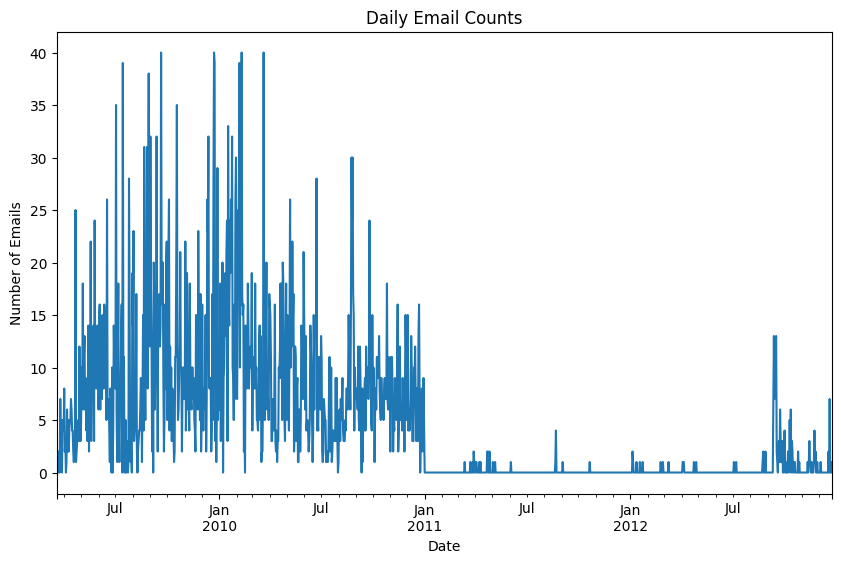

In [62]:
# Resample data to daily frequency and count emails
daily_email_counts = emails.resample('D').size()

# Plot the daily email counts
daily_email_counts.plot(figsize=(10, 6), title='Daily Email Counts')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.show()


Visualization

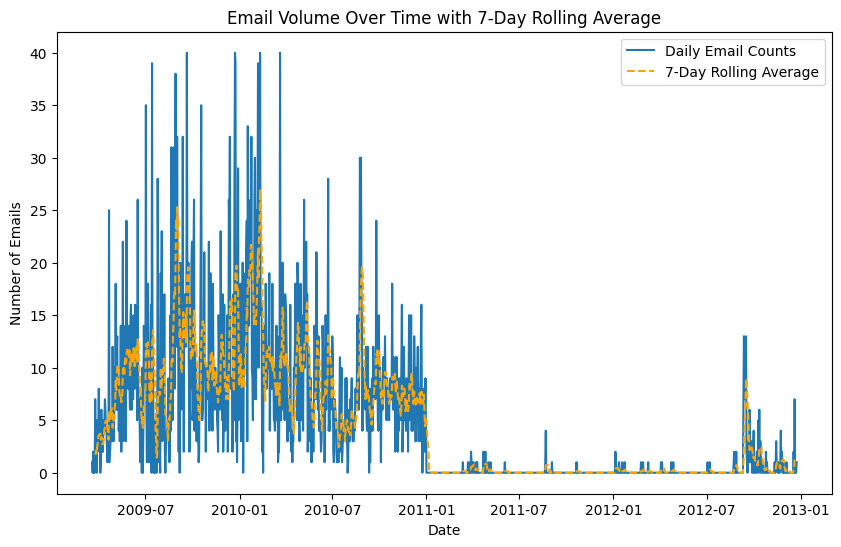

In [63]:
# Plot rolling 7-day average of email counts
rolling_avg = daily_email_counts.rolling(window=7).mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_email_counts, label='Daily Email Counts')
plt.plot(rolling_avg, label='7-Day Rolling Average', linestyle='--', color='orange')
plt.title('Email Volume Over Time with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.legend()
plt.show()


Identify any patterns or anomalies in the volume of emails sent and received.

In [64]:
from scipy.stats import zscore

# Calculate Z-scores for daily email counts
z_scores = zscore(daily_email_counts)

# Define a threshold for anomaly detection
threshold = 3

# Identify dates with anomalies
anomalies = daily_email_counts.index[abs(z_scores) > threshold]

# Print dates with anomalies
print("Dates with Anomalies:", anomalies)


Dates with Anomalies: DatetimeIndex(['2009-06-16', '2009-07-02', '2009-07-14', '2009-07-25',
               '2009-08-21', '2009-08-26', '2009-08-28', '2009-08-29',
               '2009-08-30', '2009-09-01', '2009-09-12', '2009-09-20',
               '2009-10-04', '2009-10-18', '2009-12-11', '2009-12-13',
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-29',
               '2010-01-17', '2010-01-22', '2010-01-24', '2010-01-30',
               '2010-01-31', '2010-02-06', '2010-02-08', '2010-02-10',
               '2010-03-21', '2010-05-07', '2010-06-23', '2010-08-24',
               '2010-08-26'],
              dtype='datetime64[ns]', name='ExtractedDateSent', freq=None)


Correlate these with external events or timelines.